In [1]:
% matplotlib inline
import pandas as pd
import xlrd
import numpy as np
from datetime import datetime
from datetime import timedelta
from dateutil.parser import parse
import matplotlib
import matplotlib.pyplot as  plt
import os
import powerlaw

def GetFileList(dir, fileList):
    newDir = dir
    if os.path.isfile(dir):
        fileList.append(dir.decode('gbk'))
    elif os.path.isdir(dir):
        for s in os.listdir(dir):
            newDir=os.path.join(dir,s)
            GetFileList(newDir, fileList)
    return fileList

def open_excel(file= 'file.xls'):
    try:
        data = xlrd.open_workbook(file)
        return data
    except Exception,e:
        print str(e)

busdir = 'bus'
bus_data_list = os.listdir(busdir)
taxidir = 'taxi'
taxi_data_list = os.listdir(taxidir)
s = [pd.Series()]
s.append(30000)
d1 = pd.DataFrame(s[0])
d2 = pd.DataFrame(s[0])

def busspeed(bus_data_list,d):
    j = 1
    for e in bus_data_list:
        data = open_excel(busdir+'/'+e)
        col_name = e[0:12]

        x = 0
        time = [data.sheets()[0].col_values(0)[0]]
        time.append(3000)
        for te in data.sheets()[0].col_values(0):
            if x==0:
                time[x] = te
                time.append(3000)
            else:
                time[x] = parse(te)
                time.append(3000)
            x += 1
        time.pop()
        time.pop()
        s[j] =pd.Series(data.sheets()[0].col_values(3)[1:],index=time[1:],name=col_name)
        s.append(30000)
        s[j] = s[j].groupby(level=0).mean()
        d = pd.concat([d,s[j]],axis=0)
        print(e, j,s[j].index.is_unique)
        j += 1

    #d.drop(['PTS_DATETIME'],inplace=True)
    #d = pd.concat([s[0],s[1]],axis = 1)
    #d.drop_duplicates(inplace=True)
    d.sort_index()
    return d

def taxispeed(data_list,d):
    j = 1
    for e in data_list:
        data = open_excel(taxidir+'/'+e)
        col_name = e[0:3]

        x = 0
        time = [data.sheets()[0].col_values(0)[0]]
        time.append(3000)
        for te in data.sheets()[0].col_values(0):
            if x==0:
                time[x] = te
                time.append(3000)
            else:
                time[x] = parse(te)
                time.append(3000)
            x += 1
        time.pop()
        time.pop()

        y = 0
        speed = [data.sheets()[0].col_values(3)[0]]
        speed.append(3000)
        for se in data.sheets()[0].col_values(3):
            if y==0:
                speed[y] = se
                speed.append(3000)
            else:
                speed[y] = int(se)
                speed.append(3000)
            y += 1
        speed.pop()
        speed.pop()

        s[j] =pd.Series(speed[1:],index=time[1:],name=col_name)
        s.append(30000)
        #print(int(data.sheets()[0].col_values(3)[100]))
        s[j] = s[j].groupby(level=0).mean()
        d = pd.concat([d,s[j]],axis=0)
        print(e, j,s[j].index.is_unique)
        j += 1

    #d.drop(['PTS_DATETIME'],inplace=True)
    #d = pd.concat([s[0],s[1]],axis = 1)
    #d.drop_duplicates(inplace=True)
    d.sort_index()
    return d

d1 = busspeed(bus_data_list,d1)
d1 = d1.groupby(level=0).mean()
#print(d1)
d2 = taxispeed(taxi_data_list,d2)
d2 = d2.groupby(level=0).mean()
#print(d2)

('trackId_0028.xls', 1, True)
('trackId_0031.xls', 2, True)
('trackId_0037.xls', 3, True)
('trackId_0128.xls', 4, True)
('trackId_0132.xls', 5, True)
('trackId_0134.xls', 6, True)
('trackId_0135.xls', 7, True)
('trackId_0136.xls', 8, True)
('trackId_0138.xls', 9, True)
('trackId_0140.xls', 10, True)
('trackId_0142.xls', 11, True)
('trackId_0143.xls', 12, True)
('trackId_0144.xls', 13, True)
('trackId_0146.xls', 14, True)
('010.xls', 1, True)
('011.xls', 2, True)
('012.xls', 3, True)
('013.xls', 4, True)
('014.xls', 5, True)
('015.xls', 6, True)
('016.xls', 7, True)
('017.xls', 8, True)
('018.xls', 9, True)
('019.xls', 10, True)
('020.xls', 11, True)
('021.xls', 12, True)
('022.xls', 13, True)
('023.xls', 14, True)


['1', '5', '10', '15', '20', '25', '30', '35', '40', '45', '50', '55', '60']
1     0    0.034352
dtype: float64
5     0    0.073322
dtype: float64
10    0    0.088843
dtype: float64
15      0    0.1339
dtype: float64
20    0    0.091697
dtype: float64
25     0    0.10916
dtype: float64
30     0    0.41818
dtype: float64
35    0   -0.018949
dtype: float64
40      0    0.0328
dtype: float64
45    0    0.039302
dtype: float64
50    0    0.307923
dtype: float64
55     0   -0.02976
dtype: float64
60    0    0.492592
dtype: float64
dtype: object


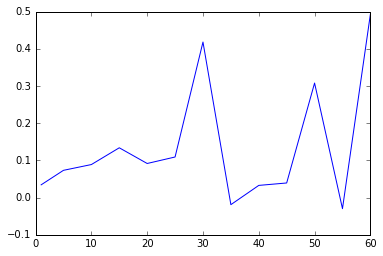

In [2]:
def getcorrwith(df1 = pd.DataFrame, df2 = pd.DataFrame, howlong = '1min', howto = 'mean'):
    df1in = df1.resample(howlong,how=howto,loffset='-1s')
    df2in = df2.resample(howlong,how=howto,loffset='-1s')
    corrwith_num = df1in.corrwith(df2in)
    return corrwith_num

tempnum2 = np.arange(0,61,5)
tempnum2[0] = 1
howlong_list = []
for e in tempnum2:
    howlong_list.append(str(e))
print(howlong_list)
corrarrow = []
for e in howlong_list:
    corrarrow.append(getcorrwith(d1,d2,e+'min'))
corrse = pd.Series(corrarrow,index=howlong_list)
print(corrse)
plt.plot(corrse)
#plt.show()这是寻找合适的时间间隔 30分钟非常合适
#但是到了30分钟的时候，数据量太少，没有可比性

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:9: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:15: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


(True, True)


C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:21: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


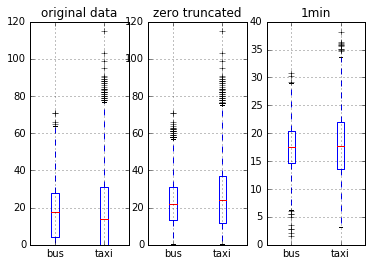

In [3]:
print(d1.index.is_unique,d2.index.is_unique)
fig = plt.figure(1)
ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)
plt.sca(ax1)
box_d1_d2 = pd.concat([d1, d2], axis = 1)
box_d1_d2.columns = ['bus','taxi']
box_d1_d2.boxplot()
plt.title('original data')

plt.sca(ax2)
box_d1_d2_n0 = pd.concat([d1[d1>0], d2[d2>0]], axis = 1)
box_d1_d2_n0.columns = ['bus','taxi']
box_d1_d2_n0.boxplot()
plt.title('zero truncated')

plt.sca(ax3)
box_d1_d2_1min = pd.concat([d1.resample('1min',how = 'mean',loffset = '-1s' ), d2.resample('1min',how = 'mean',loffset = '-1s' )], axis = 1)
box_d1_d2_1min.columns = ['bus','taxi']
box_d1_d2_1min.boxplot()
plt.title('1min')
#plt.show()
#box pic这个是计算两组数据的箱形图

然后开始计算去多重分形的去波动分析

In [4]:
d1bus_mean = box_d1_d2_1min['bus'].mean()
d2taxi_mean = box_d1_d2_1min['taxi'].mean()
print(d1bus_mean,d2taxi_mean)

(17.32312172394928, 18.040269490873477)


In [5]:
d1bus_sub_mean = box_d1_d2_1min['bus']-d1bus_mean
d1bus_cumsum = d1bus_sub_mean.cumsum()
d1bus_cumsum.columns = ['bus']
print(d1bus_cumsum)

d2taxi_sub_mean = box_d1_d2_1min['taxi']-d2taxi_mean
d2taxi_cumsum = d2taxi_sub_mean.cumsum()
d2taxi_cumsum.columns = ['taxi']
print(d2taxi_cumsum)

2015-05-25 00:59:59      0.034021
2015-05-25 01:00:59     -3.061030
2015-05-25 01:01:59     -9.442976
2015-05-25 01:02:59    -18.543875
2015-05-25 01:03:59    -26.984644
2015-05-25 01:04:59    -30.022051
2015-05-25 01:05:59    -36.220173
2015-05-25 01:06:59    -50.072707
2015-05-25 01:07:59    -60.570828
2015-05-25 01:08:59    -66.154820
2015-05-25 01:09:59    -74.773396
2015-05-25 01:10:59    -79.358422
2015-05-25 01:11:59    -90.231544
2015-05-25 01:12:59    -95.691029
2015-05-25 01:13:59   -104.101108
2015-05-25 01:14:59   -110.253775
2015-05-25 01:15:59   -114.993563
2015-05-25 01:16:59   -110.893608
2015-05-25 01:17:59   -112.853093
2015-05-25 01:18:59   -116.551215
2015-05-25 01:19:59   -121.770170
2015-05-25 01:20:59   -119.759959
2015-05-25 01:21:59   -125.425186
2015-05-25 01:22:59   -134.292752
2015-05-25 01:23:59   -146.549207
2015-05-25 01:24:59   -157.591079
2015-05-25 01:25:59   -166.927021
2015-05-25 01:26:59   -182.750143
2015-05-25 01:27:59   -197.317709
2015-05-25 01:

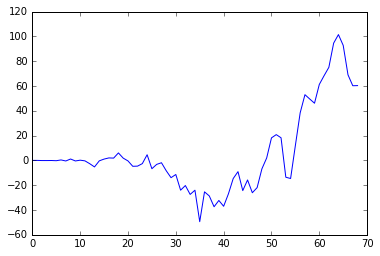

In [67]:
d1bus_cumsum = d1bus_cumsum['2015-05-25 05:00:00':'2015-05-25 12:00:00']
d2taxi_cumsum = d2taxi_cumsum['2015-05-25 05:00:00':'2015-05-25 12:00:00']
def rescov_lsq(s,sbegin):
    #s = 10
    #sbegin = 500

    xs =pd.Series(np.arange(sbegin,sbegin+s),index =d2taxi_cumsum[sbegin:sbegin+s].index )

    xlsq_bus = pd.ols(y =d1bus_cumsum[sbegin:sbegin+s],x = xs ).beta['x']
    inlsq_bus = pd.ols(y =d1bus_cumsum[sbegin:sbegin+s],x = xs ).beta['intercept']
    ylsq_bus = xs*xlsq_bus+inlsq_bus


    xlsq_taxi = pd.ols(y =d2taxi_cumsum[sbegin:sbegin+s],x = xs ).beta['x']
    inlsq_taxi = pd.ols(y =d2taxi_cumsum[sbegin:sbegin+s],x = xs ).beta['intercept']
    ylsq_taxi = xs*xlsq_taxi+inlsq_taxi

    rescov = (d1bus_cumsum[sbegin:sbegin+s]-ylsq_bus)*(d2taxi_cumsum[sbegin:sbegin+s]-ylsq_taxi)
    return rescov.describe()['mean']
#print(rescov_lsq(8,418))
rescovy = []
ss = range(1,70)
rescovs = []
N = 420
for s in ss:
    for begin in range(0,N,s):
        if N-begin<s:
            break
        else:
            rescovy.append(rescov_lsq(s,begin))
    rescovs.append(pd.Series(rescovy).mean())
    rescovy = []

plt.plot(rescovs)

Calculating best minimal value for power law fit
C:\Anaconda2\lib\site-packages\matplotlib\legend.py:633: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x13E99090>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)


(5.541739810604458, 60.213348948061785)


C:\Anaconda2\lib\site-packages\matplotlib\legend.py:633: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x13E224B0>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)
C:\Anaconda2\lib\site-packages\matplotlib\legend.py:633: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x13E27490>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)


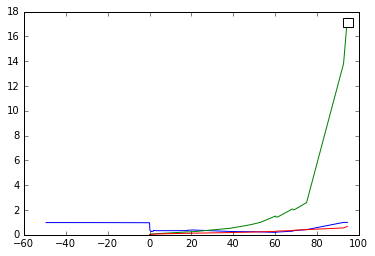

In [121]:
fit = powerlaw.Fit(rescovs,discrete=True)
print(fit.power_law.alpha,fit.xmin)
plot1 = plt.plot(fit.xmins, fit.Ds)
plot2 = plt.plot(fit.xmins, fit.sigmas)
plot3 = plt.plot(fit.xmins, fit.sigmas/fit.alphas)
plt.legend([plot1,plot2,plot3], ('red line', 'green circles','fitsigmas'))

2.26325824614


Calculating best minimal value for power law fit


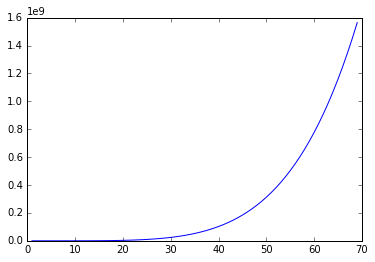

In [113]:
xx = range(1,70)
#yy = np.power(,5)
yy=np.power(xx,5)
fit2 = powerlaw.Fit(yy,discrete = True)
print(fit2.power_law.alpha)
plot1 = plt.plot(xx,yy)
#plot2 = plt.plot(xx,rescovs)
#plt.legend([plot1, plot2], ('red line', 'green circles'))# make legend